In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [5]:
df = pd.read_csv('homeprices_banglore.csv')
df.shape
df.head()
df.sample(5)


,area,bedrooms,price
6,2732,4,135.0
15,1175,2,42.0
14,2250,3,101.0
12,1000,2,38.0
1,2600,4,120.0


In [7]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [9]:
scaled_x = sx.fit_transform(df.drop('price', axis = 'columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [22]:
# By Reshaping the values  
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
print(scaled_y)


[[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]
 [0.04444444]
 [0.76296296]
 [0.91111111]
 [0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]
 [0.04444444]
 [0.05925926]
 [0.51111111]
 [0.07407407]
 [0.11851852]
 [0.20740741]
 [0.51851852]
 [0.        ]]


In [ ]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
print(scaled_y)

In [26]:
scaled_x.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

Batch GD

In [60]:
def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    num_features = x.shape[1]
    
    w  = np.ones(shape = (num_features)) # initializing weights with 1 with num_features shape
    np.ones(shape = (2))
    b = 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    
    for i in range(epochs):
        y_predicted =  np.dot(w, scaled_x.T) + b
        w_grad = -(2/total_samples) * x.T.dot(y_true - y_predicted) 
        b_grad = -(2/total_samples) * np.sum(y_true - y_predicted)    
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad   
        
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list



In [65]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

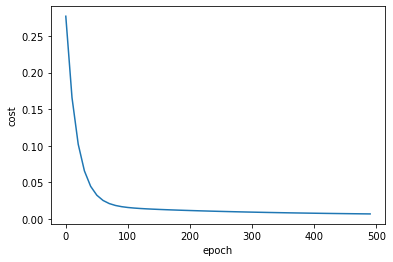

In [66]:
# plotting the chart
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [69]:
sx.transform([[2600, 3]])
# scaling between 0 and 1

array([[0.62068966, 0.5       ]])

In [70]:
w
# contain w1 and w2

array([0.70712464, 0.67456527])

In [72]:
sy.inverse_transform([[0]])# show min value of list
sy.inverse_transform([[1]])# show max value of list



array([[167.]])

In [74]:
# predicting the values
def predict(area, bedrooms, w, b):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1]+ b
    
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)
# returning this array([[128.45484403]]) but actuall is 120
# array([[128.45484403]]) it shows 2brackets in answer 
# we can eliminate by adding 0 index at return clause

128.45484403267596

In [76]:
predict(1200, 2, w, b) #bad accuracy


36.83666872271717

In [25]:
np.ones(shape = (2))
# array with w1 and w2 value

array([1., 1.])

In [27]:
w = np.ones(shape = (2))

In [28]:
np.dot(w, scaled_x.T) #represent w1 * area + w2* bedrooms

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [ ]:
w_grad = -(2/total_samples) * X.T.dot(y_true - y_predicted)

In [79]:
import random
random.randint(0, 6)

6

#### Stochstic

In [80]:
def SGD(x, y_true, epochs, learning_rate = 0.01):
    num_features = x.shape[1]
    
    w  = np.ones(shape = (num_features)) # initializing weights with 1 with num_features shape
    np.ones(shape = (2))
    b = 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    for i in range(epochs):
#         we wil use randomly pick sample
        random_index = random.randint(0, total_samples - 1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        y_predicted =  np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples) * sample_x.T.dot(sample_y - y_predicted) 
        b_grad = -(2/total_samples) * np.sum(sample_y - y_predicted)    
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad   
        
        cost = np.mean(np.square(sample_y - y_predicted))
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list
    

In [81]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)

# in sgd you have to run more 
w_sgd, b_sgd, cost_sgd,

(array([0.91365773, 0.89464714]), -0.17249248587900762, 0.06480806776300772)

In [82]:
w, b, cost


(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

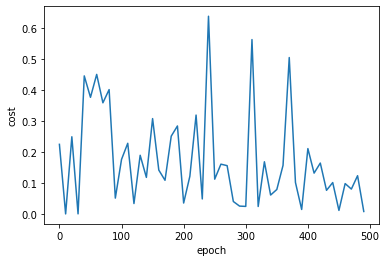

In [83]:
# plotting the chart
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [85]:
predict(2600, 4, w_sgd, b_sgd) #bad accuracy


175.85475388390796